In [133]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
from statsmodels.formula.api import ols
import plotly.graph_objs as gobj
import warnings
from sklearn.linear_model import LogisticRegression


init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff

%matplotlib inline

In [127]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [78]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

**The target variable is 'DEATH_EVENT' here**</br>

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

In [79]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


**1)Age:Age of the patient Years**</br>
**2)Anaemia:Decrease of red blood cells or hemoglobin**</br>
**3)High_blood_pressure :If a patient has hypertension**</br>
**4)Creatinine phosphokinase :Level of the CPK enzyme in the blood (CPK) mcg/L**</br>
**5)Diabetes :If the patient has diabetes**</br>
**6)Ejection fraction:Percentage of blood leaving	Percentage the heart at each contraction**</br>
**7)Sex :Woman or man	"Binary	0, 1"**</br>
**8)Platelets	:Platelets in the blood	kiloplatelets/mL**</br>
**9)Serum creatinine:Level of creatinine in the blood	mg/dL**</br>
**10)Serum sodium :Level of sodium in the blood	mEq/L**</br>
**11)Smoking	If the patient smokes	Boolean	0, 1**</br>
**12)Time	Follow-up period	Days**</br>
**13)(target) death event	If the patient died during the follow-up period	Boolean	0, 1**</br>

In [80]:
data["anaemia"] = np.where(data["anaemia"]==0,"no_anaemia","anaemia")
data["diabetes"] = np.where(data["diabetes"]==0,"no_diabetes","diabetes")
data["high_blood_pressure"] = np.where(data["high_blood_pressure"]==0,"no_high_blood_pressure","high_blood_pressure")
data["sex"] = np.where(data["sex"]==0,"female","male")
data["smoking"] = np.where(data["smoking"]==0,"non_smoker","smoker")
data["DEATH_EVENT"] = np.where(data["DEATH_EVENT"] == 0,"alive","died")

In [81]:
num_cols =data.select_dtypes(["int64","float"])

In [82]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

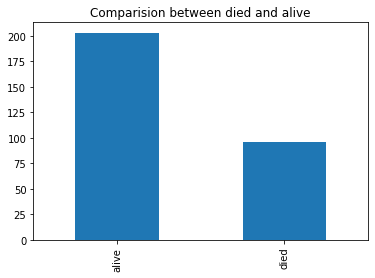

In [83]:
plt.title("Comparision between died and alive")
data["DEATH_EVENT"].value_counts().plot(kind="bar")
plt.show()

## Boxplot of numerical variables 

In [84]:
num_cols=num_cols.columns

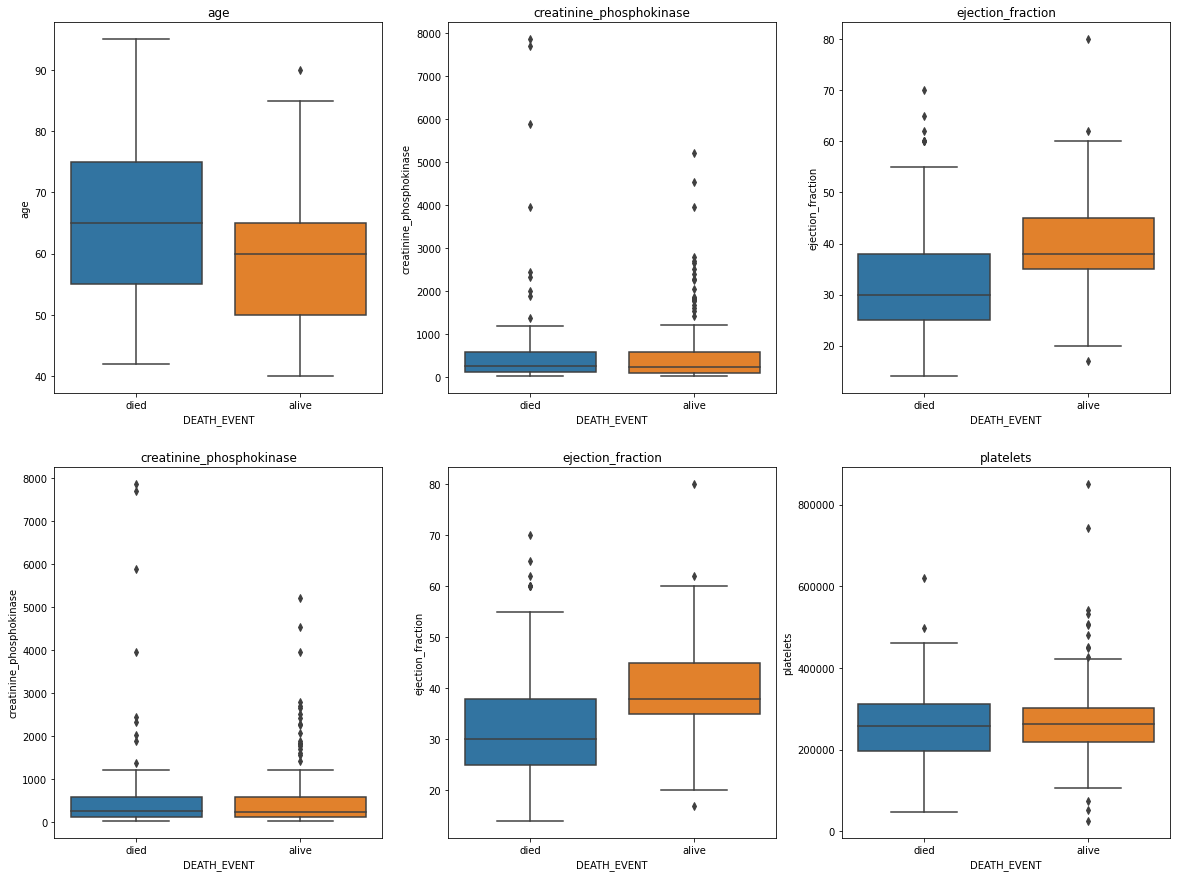

In [85]:
f, axes = plt.subplots(2, 3,figsize=(20,15))
for i in range(2):
    for j in range(3):
        sns.boxplot(data["DEATH_EVENT"],data[num_cols[i+j]],ax=axes[i][j]).set_title(num_cols[i+j])

        


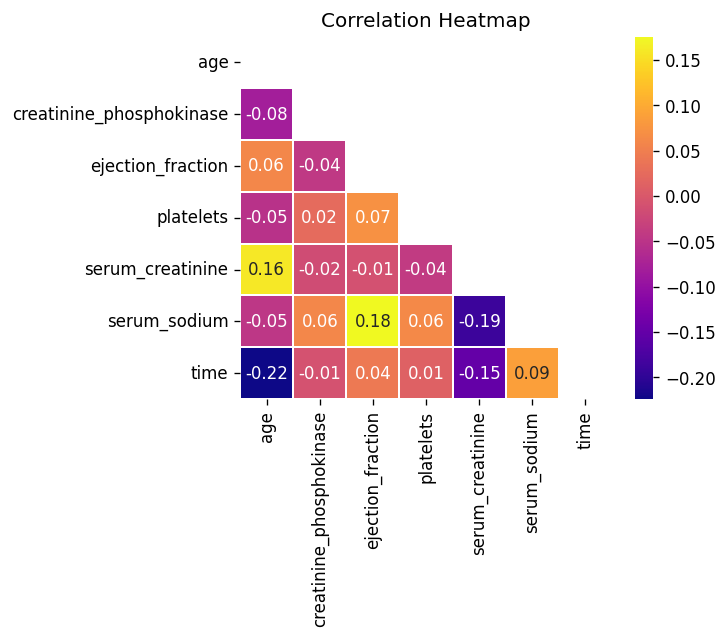

In [36]:
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(data[num_cols].corr(),dtype = bool))
sns.heatmap(data[num_cols].corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

## Distribution of numerical variables

In [37]:
num_cols

Index(['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium', 'time'],
      dtype='object')

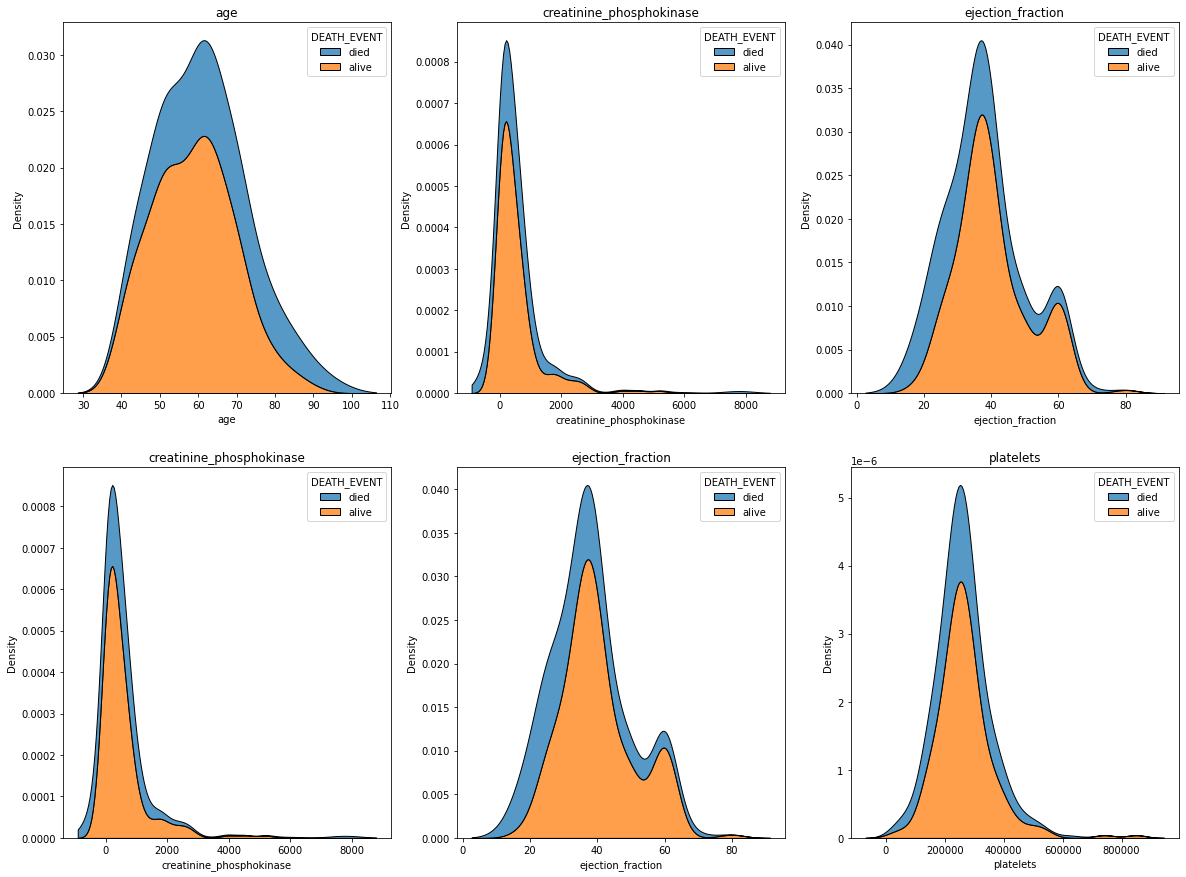

In [86]:
f, axes = plt.subplots(2, 3,figsize=(20,15))
for i in range(2):
    for j in range(3):
        sns.kdeplot(data[num_cols[i+j]],hue = data["DEATH_EVENT"],multiple='stack',ax=axes[i][j]).set_title(num_cols[i+j])

,anaemia,diabetes,high_blood_pressure,sex,smoking
0,no_anaemia,no_diabetes,high_blood_pressure,male,non_smoker
1,no_anaemia,no_diabetes,no_high_blood_pressure,male,non_smoker
2,no_anaemia,no_diabetes,no_high_blood_pressure,male,smoker
3,anaemia,no_diabetes,no_high_blood_pressure,male,non_smoker
4,anaemia,diabetes,no_high_blood_pressure,female,non_smoker
...,...,...,...,...,...
294,no_anaemia,diabetes,high_blood_pressure,male,smoker
295,no_anaemia,no_diabetes,no_high_blood_pressure,female,non_smoker
296,no_anaemia,diabetes,no_high_blood_pressure,female,non_smoker
297,no_anaemia,no_diabetes,no_high_blood_pressure,male,smoker


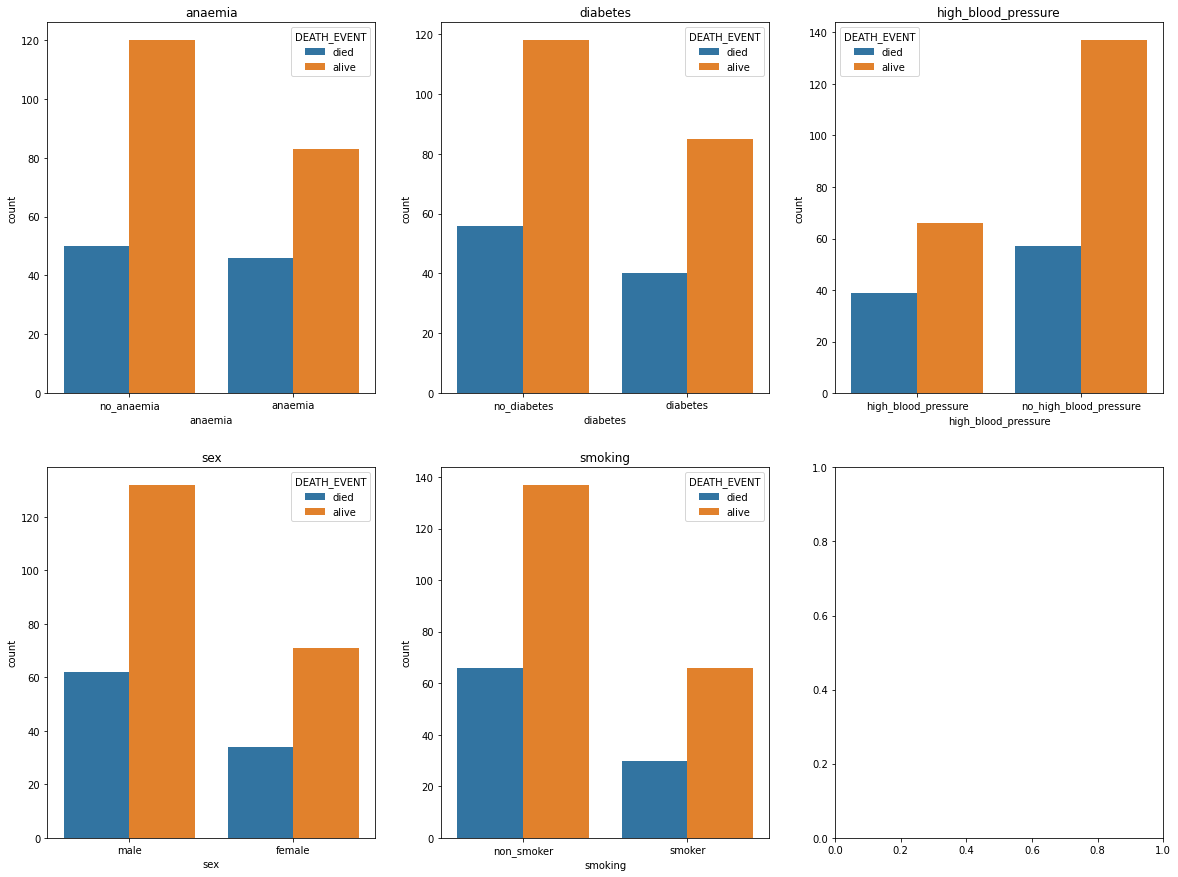

In [87]:
f, axes = plt.subplots(2, 3,figsize=(20,15))
sns.countplot(data=data,x=obj_cols[0],hue = 'DEATH_EVENT',ax=axes[0][0]).set_title(obj_cols[0])
sns.countplot(data=data,x=obj_cols[1],hue = 'DEATH_EVENT',ax=axes[0][1]).set_title(obj_cols[1])
sns.countplot(data=data,x=obj_cols[2],hue = 'DEATH_EVENT',ax=axes[0][2]).set_title(obj_cols[2])
sns.countplot(data=data,x=obj_cols[3],hue = 'DEATH_EVENT',ax=axes[1][0]).set_title(obj_cols[3])
sns.countplot(data=data,x=obj_cols[4],hue = 'DEATH_EVENT',ax=axes[1][1]).set_title(obj_cols[4])
#sns.countplot(data=data,x=obj_cols[5],hue = 'DEATH_EVENT',ax=axes[1][2])

plt.show()
    
    


## Data Preprocessing 
let us try to answer sevreal question throught statistical analysis 

In [93]:
ob_0 = pd.get_dummies(data["anaemia"])
ob_1 = pd.get_dummies(data["diabetes"])
ob_2 = pd.get_dummies(data["sex"])
ob_3 = pd.get_dummies(data["high_blood_pressure"])
ob_4 = ob_0 = pd.get_dummies(data["smoking"])

In [99]:
obj_cols = pd.concat([ob_0,ob_1,ob_2,ob_3,ob_4],axis=1)

In [103]:
data_num = data[num_cols].drop("time",axis=1)

In [114]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
data_num_arr = ss.fit_transform(data_num)
data_ss_df = pd.DataFrame(data_num_arr,columns=data_num.columns)
final_dt = pd.concat([obj_cols,data_ss_df],axis=1)

In [131]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
X = np.array(final_dt)
y=np.array(dt["DEATH_EVENT"]).reshape(-1,1)

Train/Test split results:
LogisticRegression accuracy is 0.800
LogisticRegression log_loss is 0.492
LogisticRegression auc is 0.796


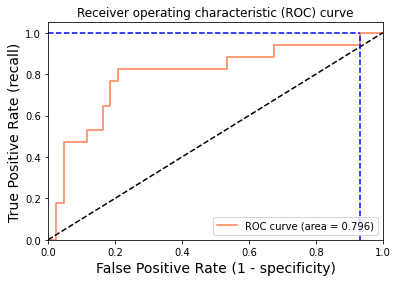

Using a threshold of 0.061 guarantees a sensitivity of 1.000 and a specificity of 0.070, i.e. a false positive rate of 93.02%.


In [134]:


# create X (features) and y (response)


# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))